# Lesson 11: Image Captioning

- In the classroom, the libraries are already installed for you.
- If you would like to run this code on your own machine, you can install the following:

```
    !pip install transformers
```

- Here is some code that suppresses warning messages.

In [1]:
from transformers.utils import logging
logging.set_verbosity_error()

import warnings
warnings.filterwarnings("ignore", message="Using the model-agnostic default `max_length`")

- Load the Model and the Processor.

In [2]:
from transformers import BlipForConditionalGeneration

In [3]:
model = BlipForConditionalGeneration.from_pretrained(
    "Salesforce/blip-image-captioning-base")

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

Info about [Salesforce/blip-image-captioning-base](https://huggingface.co/Salesforce/blip-image-captioning-base)

In [4]:
from transformers import AutoProcessor

In [5]:
processor = AutoProcessor.from_pretrained(
    "Salesforce/blip-image-captioning-base")

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


- Load the image.

In [18]:
from PIL import Image

In [19]:
image = Image.open("./image.jpeg")

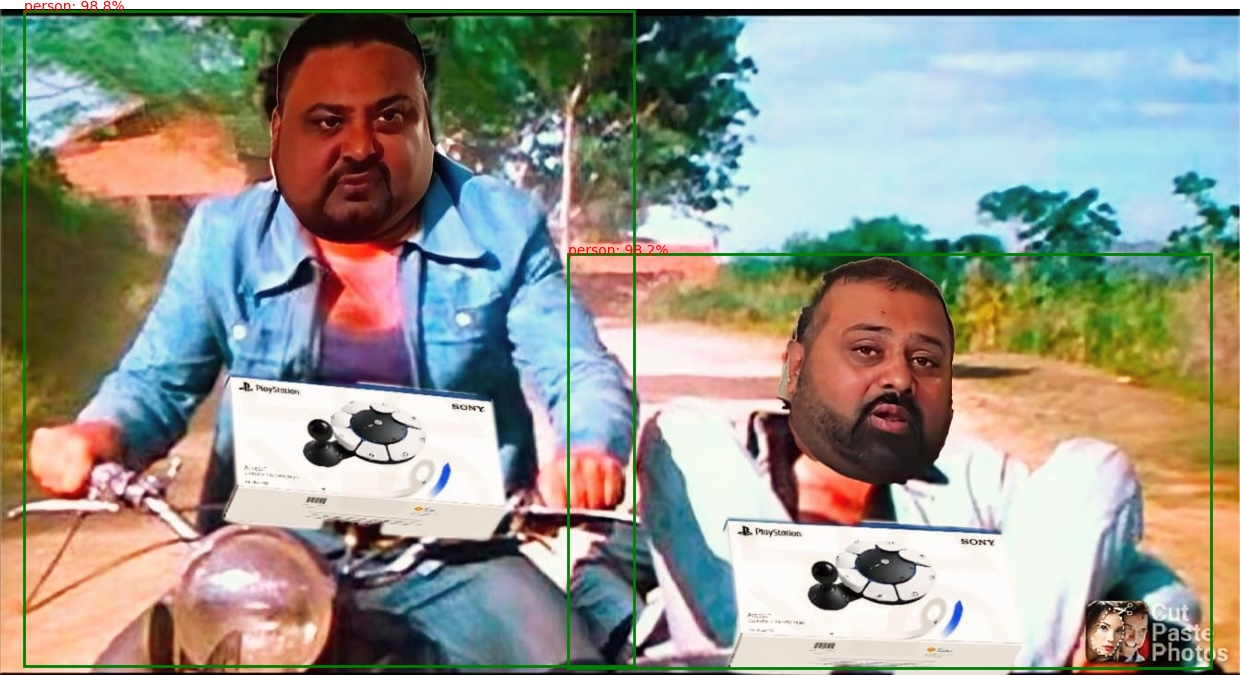

In [20]:
image

### Conditional Image Captioning

In [21]:
text = "a photograph of"
inputs = processor(image, text, return_tensors="pt")

In [22]:
inputs

{'pixel_values': tensor([[[[ 1.9157,  1.9157,  1.9157,  ...,  1.9157,  1.9011,  1.9157],
          [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
          [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
          ...,
          [ 1.8573,  1.9303,  1.9303,  ...,  1.5654,  1.5070,  1.5654],
          [ 0.9084,  0.7917,  0.8792,  ...,  0.5873,  0.5289,  0.6603],
          [-0.9018, -1.0477, -1.0039,  ..., -0.8726, -0.9456, -0.7266]],

         [[ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
          [ 2.0599,  2.0749,  2.0599,  ...,  2.0749,  2.0749,  2.0749],
          [ 2.0599,  2.0599,  2.0599,  ...,  2.0749,  2.0749,  2.0599],
          ...,
          [ 1.2194,  1.3095,  1.2945,  ...,  0.8292,  0.7092,  0.7842],
          [ 0.3340,  0.1989,  0.2890,  ..., -0.0112, -0.1313,  0.0188],
          [-1.4519, -1.6320, -1.6020,  ..., -1.4219, -1.5120, -1.2869]],

         [[ 2.1175,  2.1175,  2.1459,  ...,  2.1175,  2.1175,  2.1317],
          [ 2

In [23]:
out = model.generate(**inputs)

In [24]:
out

tensor([[30522,  1037,  9982,  1997,  2048,  2273,  2006,  1037,  9055,   102]])

In [25]:
print(processor.decode(out[0], skip_special_tokens=True))

a photograph of two men on a motorcycle


### Unconditional Image Captioning

In [14]:
inputs = processor(image,return_tensors="pt")

In [15]:
out = model.generate(**inputs)

In [16]:
print(processor.decode(out[0], skip_special_tokens=True))

a woman sitting on the beach with her dog


### Try it yourself! 
- Try this model with your own images and texts!